In [2]:
#pip install pyspark

In [4]:
from pyspark.sql import SparkSession

In [5]:
spark=SparkSession.builder.appName("Tips Data Analysis").getOrCreate()

In [6]:
df=spark.read.csv("/content/tips.csv",header=True,inferSchema=True)

In [7]:
df.show(10)

+----------+----+------+------+---+------+----+
|total_bill| tip|   sex|smoker|day|  time|size|
+----------+----+------+------+---+------+----+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|
|     25.29|4.71|  Male|    No|Sun|Dinner|   4|
|      8.77| 2.0|  Male|    No|Sun|Dinner|   2|
|     26.88|3.12|  Male|    No|Sun|Dinner|   4|
|     15.04|1.96|  Male|    No|Sun|Dinner|   2|
|     14.78|3.23|  Male|    No|Sun|Dinner|   2|
+----------+----+------+------+---+------+----+
only showing top 10 rows



In [8]:
df.describe().show()

+-------+------------------+------------------+------+------+----+------+------------------+
|summary|        total_bill|               tip|   sex|smoker| day|  time|              size|
+-------+------------------+------------------+------+------+----+------+------------------+
|  count|               244|               244|   244|   244| 244|   244|               244|
|   mean|19.785942622950824|2.9982786885245902|  NULL|  NULL|NULL|  NULL| 2.569672131147541|
| stddev| 8.902411954856857|1.3836381890011815|  NULL|  NULL|NULL|  NULL|0.9510998047322347|
|    min|              3.07|               1.0|Female|    No| Fri|Dinner|                 1|
|    max|             50.81|              10.0|  Male|   Yes|Thur| Lunch|                 6|
+-------+------------------+------------------+------+------+----+------+------------------+



In [9]:
df_cleaned=df.dropna()

In [10]:
avg_tip_day=df_cleaned.groupBy("day").avg("tip")

In [11]:
avg_tip_day.show()
## Avg tip is more on Sundays and least on fridays

+----+-----------------+
| day|         avg(tip)|
+----+-----------------+
|Thur|2.771451612903226|
| Sun|3.255131578947369|
| Sat|2.993103448275862|
| Fri|2.734736842105263|
+----+-----------------+



In [12]:
sum_tip_sex=df_cleaned.groupBy("sex").sum("tip")
sum_tip_sex.show()
### Male is giving more tips than female

+------+-----------------+
|   sex|         sum(tip)|
+------+-----------------+
|Female|           246.51|
|  Male|485.0700000000001|
+------+-----------------+



In [13]:
smoker_count=df_cleaned.groupBy("sex","smoker").count()
smoker_count.show()

## There is no significant relationship between smoking and gender

+------+------+-----+
|   sex|smoker|count|
+------+------+-----+
|  Male|    No|   97|
|  Male|   Yes|   60|
|Female|    No|   54|
|Female|   Yes|   33|
+------+------+-----+



In [14]:
54+33

87

In [16]:
3300/87

37.93103448275862

In [15]:
97+60

157

In [17]:
6000/157

38.21656050955414

In [18]:
tot_bill_timewise=df_cleaned.groupBy("time").sum("total_bill")
tot_bill_timewise.show()

### Totalbill is more in dinner than lunch

+------+------------------+
|  time|   sum(total_bill)|
+------+------------------+
| Lunch|1167.4699999999998|
|Dinner|3660.3000000000015|
+------+------------------+



In [19]:
sum_bill=df_cleaned.groupBy("sex").sum("total_bill")
sum_bill.show()

### Total bill is paid more by male than female

+------+------------------+
|   sex|   sum(total_bill)|
+------+------------------+
|Female|1570.9499999999998|
|  Male|3256.8200000000024|
+------+------------------+



In [21]:
day_bill=df_cleaned.groupBy("Day").avg("total_bill")
day_bill.show()

### There is a good relationship(correlation) b/w total bill and tips

+----+------------------+
| Day|   avg(total_bill)|
+----+------------------+
|Thur|17.682741935483865|
| Sun|21.410000000000004|
| Sat|20.441379310344825|
| Fri|17.151578947368417|
+----+------------------+



In [22]:
max_tip_time=df_cleaned.groupBy("time").max("tip")
max_tip_time.show()

+------+--------+
|  time|max(tip)|
+------+--------+
| Lunch|     6.7|
|Dinner|    10.0|
+------+--------+



In [23]:
df=df_cleaned.toPandas()

In [24]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


from matplotlib import pyplot as plt
_df_0['total_bill'].plot(kind='hist', bins=20, title='total_bill')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['tip'].plot(kind='hist', bins=20, title='tip')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['size'].plot(kind='hist', bins=20, title='size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='total_bill', y='tip', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='tip', y='size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['total_bill']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('total_bill')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['tip']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('tip')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['size']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('size')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'time'}, axis=1)
              .sort_values('time', ascending=True))
  xs = counted['time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['total_bill'].plot(kind='line', figsize=(8, 4), title='total_bill')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['tip'].plot(kind='line', figsize=(8, 4), title='tip')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['size'].plot(kind='line', figsize=(8, 4), title='size')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='total_bill', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='tip', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='size', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

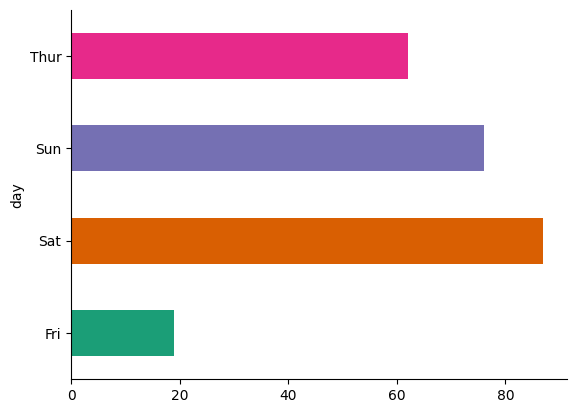

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

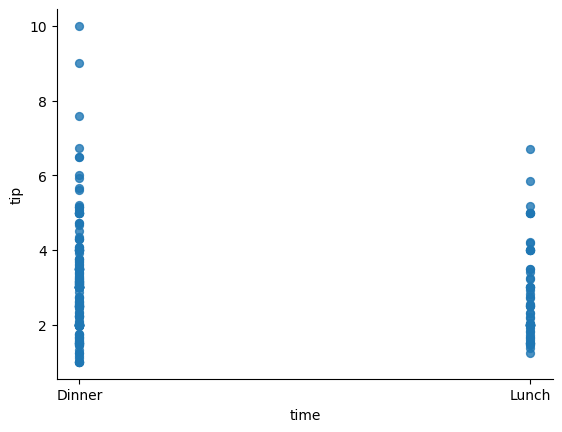

In [30]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='time', y='tip', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)